In [5]:
from CellularAutomaton import *
from IPython.display import display

from math import *
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

from matplotlib import animation
matplotlib.rc('animation', html='html5')

goldenratio=1/2*(1+sqrt(5))
fsx=7
fsy=fsx/goldenratio

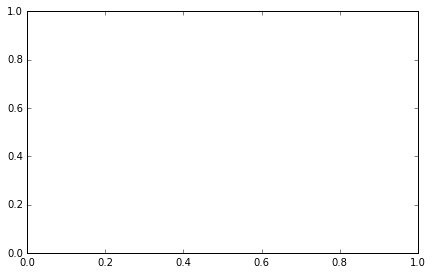

In [2]:
MyFigure, MyAxes = plt.subplots(1,1,figsize=(fsx,fsy))

In [3]:
def uf(CAGridObj):
    CAGridOjb.Update
    #gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
    MyAxes.matshow(CAGridObj)
    MyFigure

In [4]:
def af(n):
    uf()

<h2>Functions to help with testing</h2>

In [12]:
MyDtype = numpy.dtype([('Value','b')])

def setvalues(grid, rows, columns, states):
    i=0
    for y in range(rows):
        for x in range(columns):
            grid["Value"][y][x]=states[i]
            i = i + 1
    grid.SetBoundary()

<h2>Test a 3 x 3 Behavior</h2>

In [13]:
rows = 3
columns = 3
MyGrid3_3=CAGrid((rows,columns),MyDtype)
setvalues(MyGrid3_3, rows, columns, (0,1,0,1,0,1,0,1,0))
#MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(MyGrid3_3)
MyFigure
print_grid()

TypeError: Image data can not convert to float

In [13]:
u()

0 1 1 
 1 1 0 
 1 1 1


In [ ]:
u()

In [ ]:
u()

In [ ]:
u()

In [ ]:
u()

<h2>Small Grid Animation Test</h2>

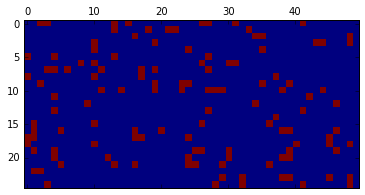

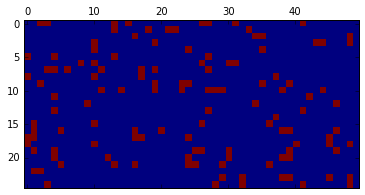

In [22]:
cell.ProbInitialTrue = .1
rows = 25
columns = 50
grid=[[cell() for x in range(columns)] for y in range(rows)]
SetNeighbors(grid, columns, rows)
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure

In [23]:
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 3.3 seconds long.


In [24]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h2>Glider Example</h2>
<h3>Small Grid Example</h3>

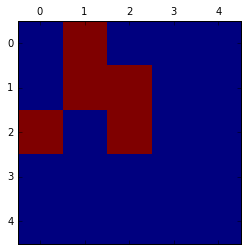

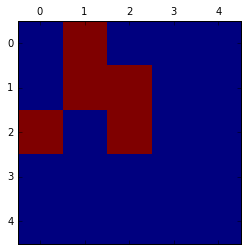

In [26]:
cell.ProbInitialTrue = 0
rows = 5
columns = 5
grid=[[cell() for x in range(columns)] for y in range(rows)]
SetNeighbors(grid, columns, rows)

grid[0][1].state = True
grid[1][1].state = True
grid[1][2].state = True
grid[2][0].state = True
grid[2][2].state = True

[[grid[y][x].set_value() for x in range(columns)] for y in range(rows)]
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure

In [27]:
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 3.3 seconds long.


In [28]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Large Grid Example</h3>

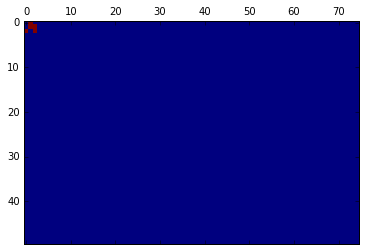

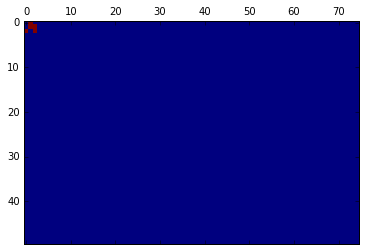

In [30]:
cell.ProbInitialTrue = 0
rows = 50
columns = 75
grid=[[cell() for x in range(columns)] for y in range(rows)]
SetNeighbors(grid, columns, rows)

grid[0][1].state = True
grid[1][1].state = True
grid[1][2].state = True
grid[2][0].state = True
grid[2][2].state = True

[[grid[y][x].set_value() for x in range(columns)] for y in range(rows)]
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure

In [31]:
AnimationFrames = 1000  #total number of frames in animation.
DelayBetweenFrames = 20 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 20.0 seconds long.


In [32]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h2>Full Game of Life Simulations</h2>
<h3>Simulation 01</h3>

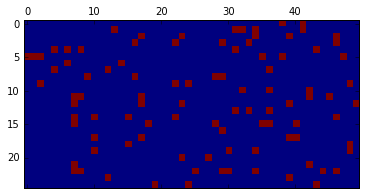

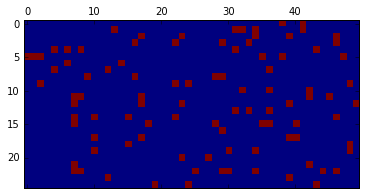

In [33]:
cell.ProbInitialTrue = .07
rows = 25
columns = 50
grid=[[cell() for x in range(columns)] for y in range(rows)]
SetNeighbors(grid, columns, rows)
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure

In [34]:
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 5.0 seconds long.


In [35]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Simulation 02</h3>

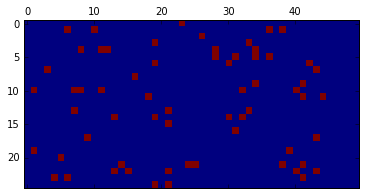

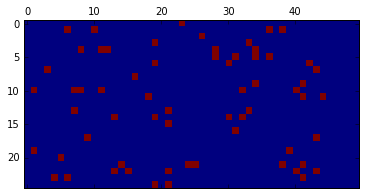

In [36]:
cell.ProbInitialTrue = .051
rows = 25
columns = 50
grid=[[cell() for x in range(columns)] for y in range(rows)]
SetNeighbors(grid, columns, rows)
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure

In [37]:
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 5.0 seconds long.


In [38]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation